# Pymaceuticals Inc.
---

### Analysis

- **Capomulin and Ramicane See Largest Tumor Decrease:** For all drug treatment protocols, Capomulin and Ramicane saw the largest tumor decrease, which suggests that these may be extremely effective treatments.
- **Final Tumor Volume is Directly Correlated with Mouse Weight:** Statistical analysis determined a direct relationship between mouse weight and final tumor volume, and heavier mice having larger tumors.
- **More Frequency of Effective Regimens Monitoring:** The bar chart comparison revealed that Ramicane and Capomulin were monitored more frequently, attesting to their importance in the study.
- **Fewer Outliers for Capomulin and Ramicane Regimens:** The box plots ensured that these treatment regimens yielded consistent reductions in the tumor with fewer outlier values compared to the others.
- **Regression Analysis Confirms Tumor Growth Trends:** Linear regression modeling supported the correlation of weight and tumor volume, supporting targeted therapy approaches. 

### Conclusion
Capomulin and Ramicane were the most effective SCC treatments, with consistent tumor reduction. The findings recommend future testing to validate their effectiveness on larger applications. Further research on weight-based tumor growth can result in improved individualization of treatment.


 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
mouse_count = mouse_data["Mouse ID"].nunique()
mouse_count

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data.loc[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
print (f"Mouse ID of duplicate mice: {duplicate_mice}")

Mouse ID of duplicate mice: ['g989']


In [21]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate = mouse_data[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mouse_data[~mouse_data["Mouse ID"].isin(duplicate_mice)]
mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean["Mouse ID"].nunique()


248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mouse_summary = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median', variance='var', std_dev='std', sem='sem')
mouse_summary.rename(columns={'mean': 'Mean Tumor Volume','median': 'Median Tumor Volume','variance': 'Tumor Volume Variance','std_dev': 'Tumor Volume Std. Dev.','sem': 'Tumor Volume Std. Err'}, inplace=True)
mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summary_agg = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_summary_agg.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err'
    }, inplace=True)
mouse_summary_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

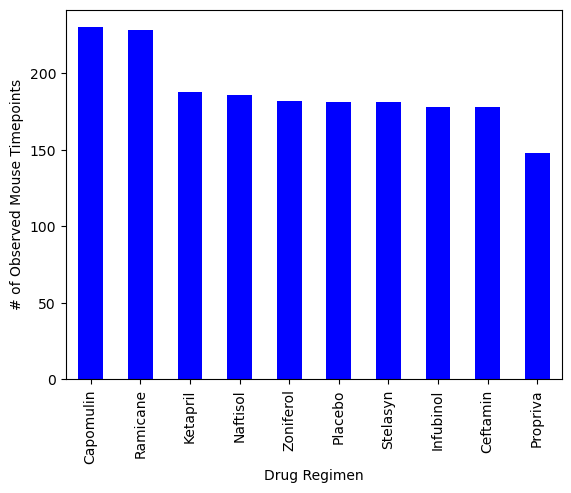

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar = mouse_data_clean['Drug Regimen'].value_counts()
mice_bar.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

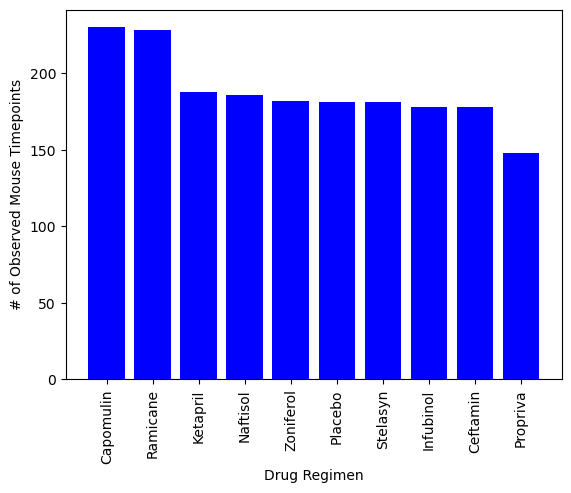

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_bar_pyplot = mouse_data_clean['Drug Regimen'].value_counts()
plt.bar(mice_bar_pyplot.index, mice_bar_pyplot.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()


<Axes: ylabel='count'>

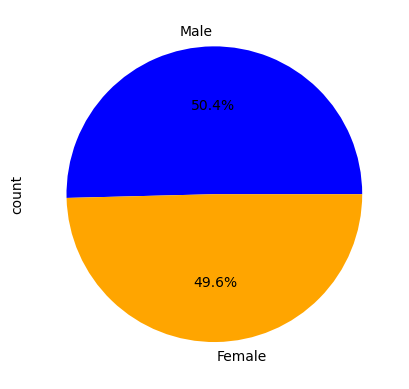

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_gender = mouse_data_clean.drop_duplicates(subset='Mouse ID')[['Mouse ID','Sex']]
# Get the unique mice with their gender
mice_gender_count = mice_gender['Sex'].value_counts()

# Make the pie chart
mice_gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['blue', 'orange'])


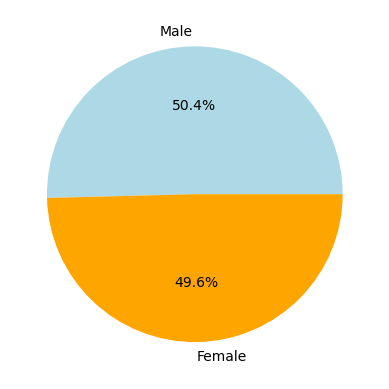

In [69]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
mice_gender = mouse_data_clean.drop_duplicates(subset='Mouse ID')[['Mouse ID','Sex']]
# Get the unique mice with their gender
mice_gender_count = mice_gender['Sex'].value_counts()

# Make the pie chart
plt.pie(mice_gender_count, labels=mice_gender_count.index, autopct='%1.1f%%', startangle=0, colors=['lightblue', 'orange'])
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = mouse_data_clean[mouse_data_clean['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_volume.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, mouse_data_clean, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in treatment_regimens:
    # Append tumor volume data for each drug regimen
    drug_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol.append(drug_data)
    
    # Calculate the quartiles and IQR for each drug regimen
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * IQR)
    upper_bound = upperq + (1.5 * IQR)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Owner\AppData\Local\Temp\ipykernel_14924\3839558366.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol, labels=treatment_regimens, flierprops={'markerfacecolor': 'red', 'markersize': 10})


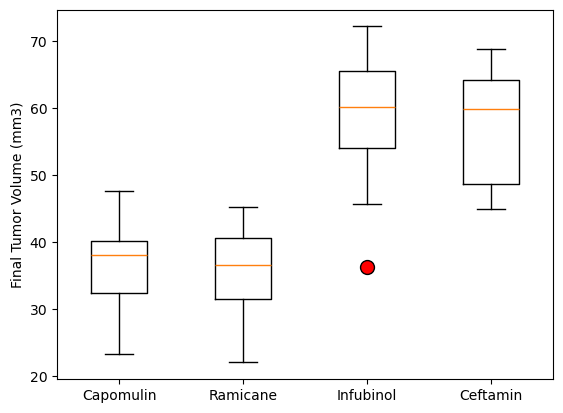

In [81]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatment_regimens, flierprops={'markerfacecolor': 'red', 'markersize': 10})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [86]:
# Select a mouse that was treated with Capomulin
capomulin_mice = mouse_data_clean[mouse_data_clean['Drug Regimen'] == 'Capomulin']
capomulin_mice = capomulin_mice.reset_index(drop=True)
capomulin_mice = capomulin_mice.loc[0, 'Mouse ID']
capomulin_mice

's185'

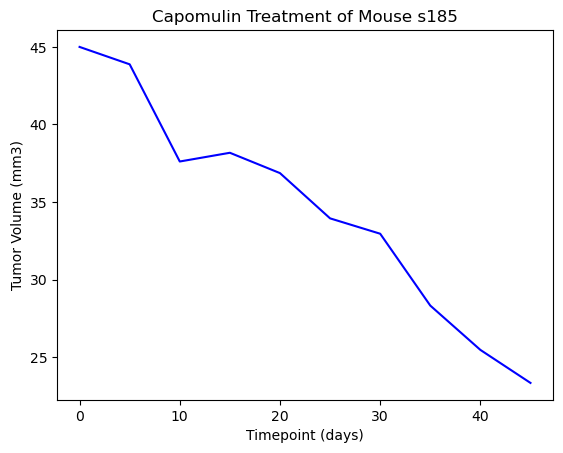

In [88]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
mouse_data_single = mouse_data_clean[mouse_data_clean['Mouse ID'] == mouse_id]
plt.plot(mouse_data_single['Timepoint'], mouse_data_single['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.show()


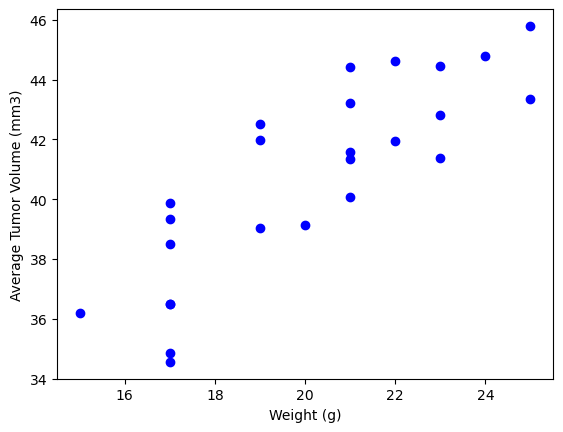

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = mouse_data_clean[mouse_data_clean['Drug Regimen'] == 'Capomulin']
capomulin_mice_avg = capomulin_mice.groupby('Mouse ID').agg({
	'Weight (g)': 'mean',
	'Tumor Volume (mm3)': 'mean'
})

plt.scatter(capomulin_mice_avg['Weight (g)'], capomulin_mice_avg['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


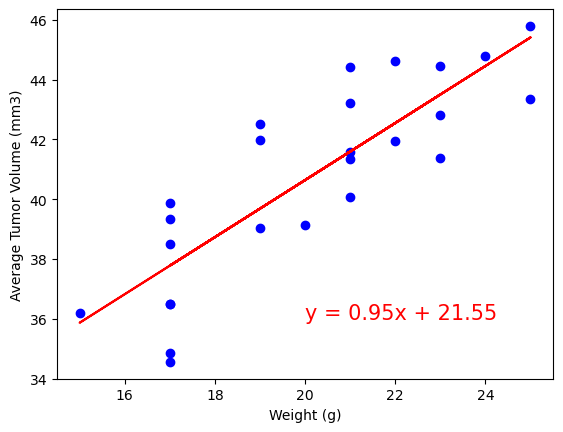

In [91]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_mice_avg['Weight (g)'], capomulin_mice_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mice_avg['Weight (g)'], capomulin_mice_avg['Tumor Volume (mm3)'])
regress_values = capomulin_mice_avg['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_mice_avg['Weight (g)'], capomulin_mice_avg['Tumor Volume (mm3)'], color='blue')
plt.plot(capomulin_mice_avg['Weight (g)'], regress_values, color='red')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
